# Understanding Heart Disease with Machine Learning and Statistical Techniques

## Import Libraries and Detect Encoding for Data File

In [1]:
# Import libraries

# The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell. 
# The drawn plots are shown below the code and stored in the notebook document for future reference.
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.figure_factory as ff

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Checking for the encoding for csv files
# Ensure that the file can be read and processed correctly by a program or application that is designed to work with CSV data

# Use chardet library to automatically detect the character encoding of a given text or byte string
import chardet

data_path = 'dataset/heart.csv'
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Extract Data from .csv

In [3]:
# Read heart.csv file into Pandas Data Frame by decoding it based on the result of encoding from chardet
df = pd.read_csv(data_path, encoding = result['encoding'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Understanding Data Structure

In [4]:
# Extract the description of each header from .csv file
data_path2 = 'dataset/heart-glossary.csv'
with open(data_path2, 'rb') as f:
    result = chardet.detect(f.read())

df_descriptions = pd.read_csv(data_path2, encoding = result['encoding'])
df_descriptions

,Column,Source,Description,Remarks
0,age,UCI Machine Learning Repository,Age of patient,Unit in Years
1,sex,UCI Machine Learning Repository,"Sex of the patient (Male, Female)",Male or Female
2,cp,UCI Machine Learning Repository,Chestpain Type,"Typical Angina (TA), Atypical Angina (ATA), No..."
3,tresbps,UCI Machine Learning Repository,Resting blood pressure (On admission to the ho...,Unit in mm Hg
4,chol,UCI Machine Learning Repository,Serum cholesterol,Unit in mm/dl
5,fbs,UCI Machine Learning Repository,Fasting blood sugar. More than 120mg/dl consid...,>120mg/dl or <=120mg/dl
6,restecg,UCI Machine Learning Repository,Resting electrocardiogram results,"Normal, ST-T wave abnormality, Left ventricula..."
7,thalach,UCI Machine Learning Repository,MaxHR: maximum heart rate achieved,Numeric value between 60 and 202
8,exang,UCI Machine Learning Repository,ExerciseAngina: exercise-induced angina,Yes or No
9,oldpeak,UCI Machine Learning Repository,ST depression induced by exercise relative to ...,Numeric value measured in depression


In [5]:
# Check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#check unique column
df.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
for feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

sex 2 unique values are: [1 0]
cp 4 unique values are: [0 1 2 3]
fbs 2 unique values are: [0 1]
restecg 3 unique values are: [1 0 2]
exang 2 unique values are: [0 1]
slope 3 unique values are: [2 0 1]
ca 5 unique values are: [2 0 1 3 4]
thal 4 unique values are: [3 2 1 0]
target 2 unique values are: [0 1]


## Data Preparation
### Generate descriptive statistics of the dataframe by using df.describe

* count: the number of non-null values in each column
* mean: the arithmetic mean of each column
* std: the standard deviation of each column
* min: the minimum value of each column
* 25%: the 25th percentile (first quartile) of each column
* 50%: the 50th percentile (second quartile or median) of each column
* 75%: the 75th percentile (third quartile) of each column
* max: the maximum value of each column

In [8]:
# Generate descriptive statistics of the selected data
df1 = df.describe()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# check for missing value
df2 = df1.iloc[0] < df.shape[0]
df2

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
Name: count, dtype: bool

### Check for outliers

In [10]:
def plot_histogram(df, columns, columns_per_row=3):
    """
    Plot histograms for multiple columns in a grid layout with grids and distribution lines.

    Parameters:
        -- df (pd.DataFrame): The DataFrame containing the data to be plotted.
        -- columns (list): The list of column names for which histograms are to be plotted.
        -- columns_per_row (int): The number of columns to be displayed per row in the grid. Default is 3.

    Returns:
        None
    """
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / columns_per_row)
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], ax=axes[i], kde=True, color='steelblue')
        axes[i].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
        axes[i].set_title(f'Histogram: {col}')
        
    # Remove extra axes
    for j in range(num_plots, num_rows * columns_per_row):
        axes[j].remove()
    
    plt.tight_layout()
    plt.show()

In [11]:
# check outliers for continuos columns
df_out = df.copy()
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

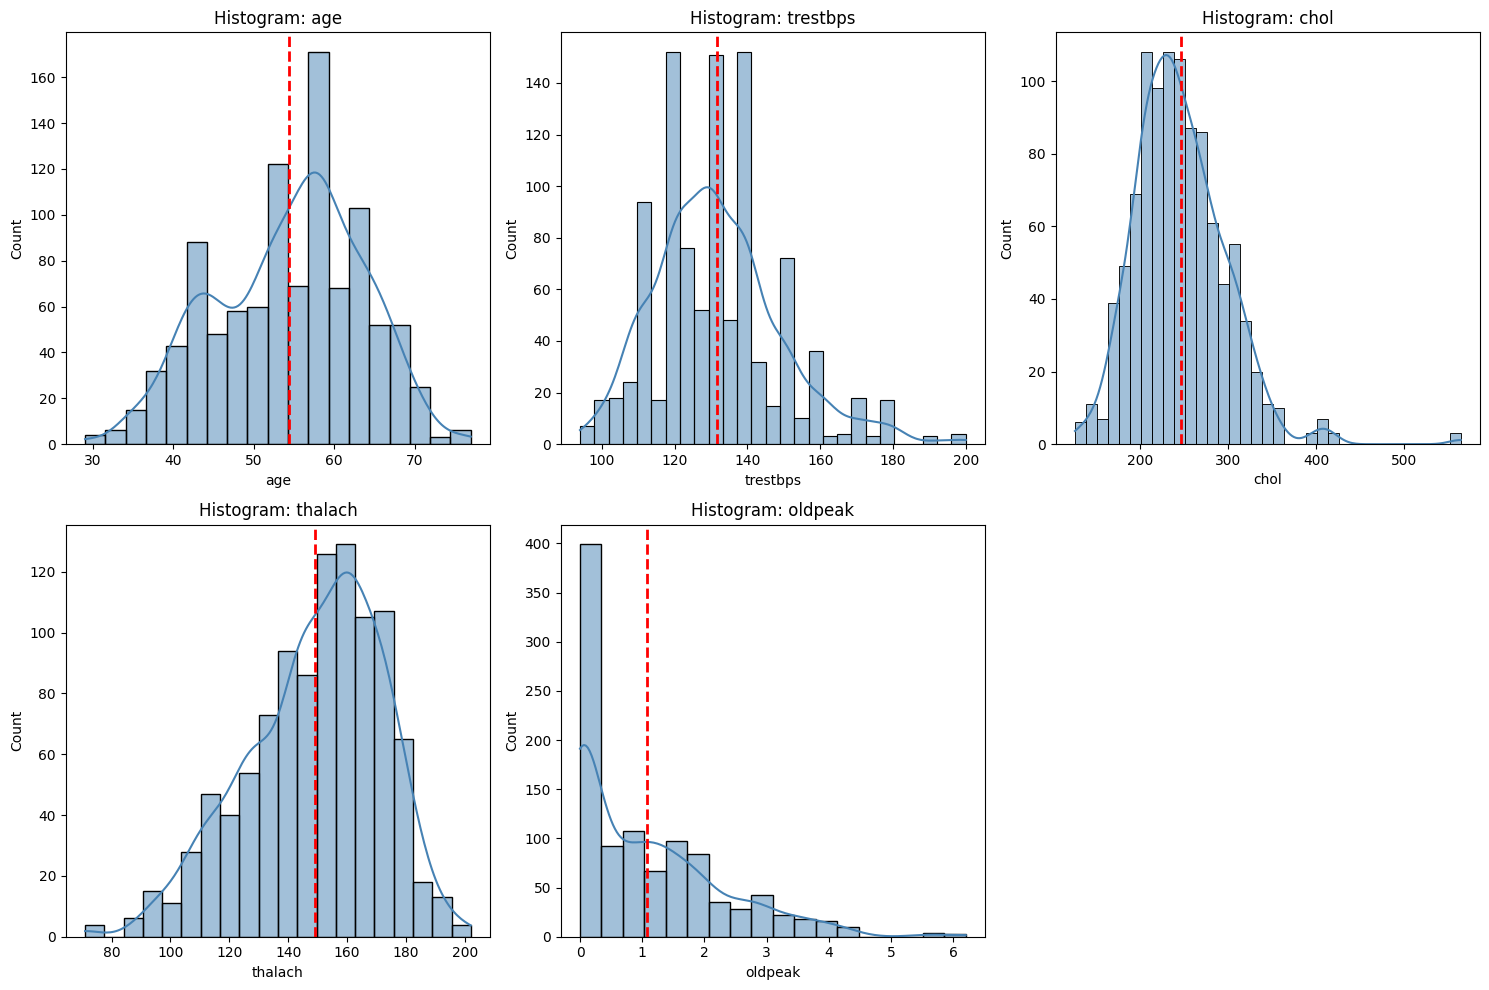

In [12]:
plot_histogram(df_out, selected_columns)

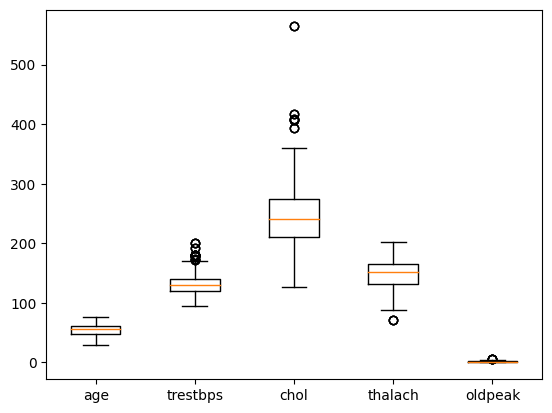

In [13]:
df3 = df.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'])
df3

# create a boxplot for each column
plt.boxplot(df3.values, labels = df3.columns)

# show the plot
plt.show()

### Eliminating Outliers

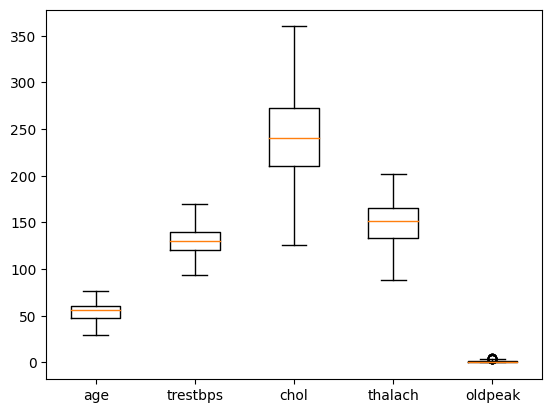

In [14]:
df4 = df.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'])
df4

# calculate quartiles and interquartile range for each column
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1

# identify potential outliers for each column
outliers = (df4 < (Q1 - 1.5 * IQR)) | (df4 > (Q3 + 1.5 * IQR))

# replace the outliers with the median of the column
df4[outliers] = np.nan
df4.fillna(df.median(), inplace=True)

# create a boxplot for each column
plt.boxplot(df4.values, labels = df4.columns)

# show the plot
plt.show()

In [15]:
# Concatenate back the drop off columns with the clean data
clean_df = pd.concat([df4, df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]], axis =1)
clean_df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,52,125.0,212.0,168.0,1.0,1,0,0,1,0,2,2,3,0
1,53,140.0,203.0,155.0,3.1,1,0,1,0,1,0,0,3,0
2,70,145.0,174.0,125.0,2.6,1,0,0,1,1,0,0,3,0
3,61,148.0,203.0,161.0,0.0,1,0,0,1,0,2,1,3,0
4,62,138.0,294.0,106.0,1.9,0,0,1,1,0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140.0,221.0,164.0,0.0,1,1,0,1,1,2,0,2,1
1021,60,125.0,258.0,141.0,2.8,1,0,0,0,1,1,1,3,0
1022,47,110.0,275.0,118.0,1.0,1,0,0,0,1,1,1,2,0
1023,50,110.0,254.0,159.0,0.0,0,0,0,0,0,2,0,2,1


### Data Correlation

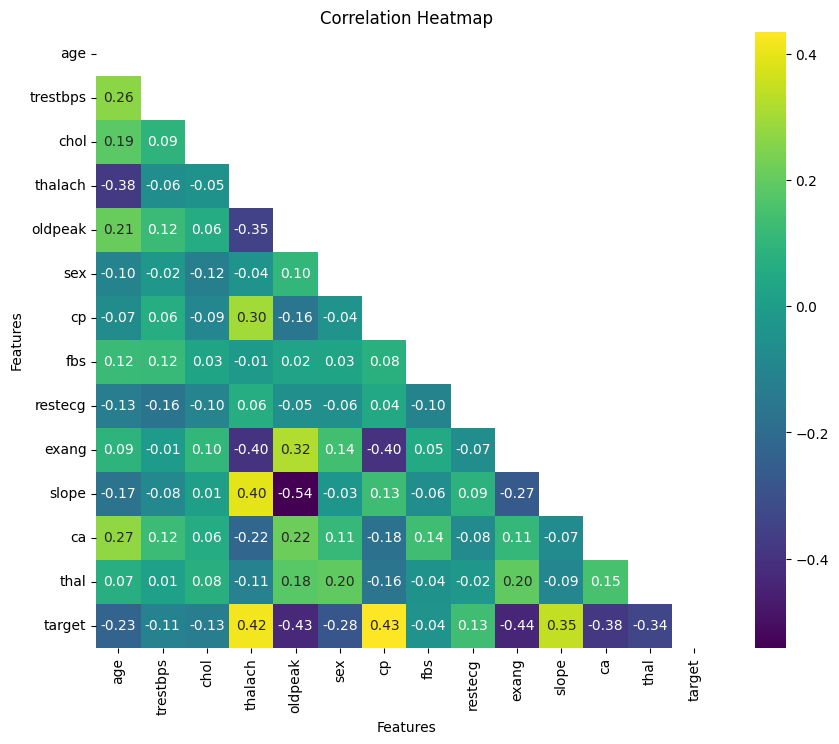

In [16]:
# Create a copy of the DataFrame for correlation
df_corr = clean_df.copy()
df_corr = df_corr.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr[mask] = np.nan

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f", cmap="viridis", cbar=True, ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Heatmap")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Show the plot
plt.show()

In [17]:
df_corr["target"].abs().sort_values(ascending=False)

age        NaN
trestbps   NaN
chol       NaN
thalach    NaN
oldpeak    NaN
sex        NaN
cp         NaN
fbs        NaN
restecg    NaN
exang      NaN
slope      NaN
ca         NaN
thal       NaN
target     NaN
Name: target, dtype: float64

From the correlation heatmap, `fbs` has the least correlation coefficient to target

#### Data Visualization for Deeper Analysis
Let's try to investigate deeper on the relationship between two specific columns by refering on the question below:
1. Which gender has higher chance of getting heart disease?
2. Which chest pain type has highest possibilities to lead to heart disease?
3. Which major vessels number tend to detected as heart disease?
4. Which fields has the positive correlation to the patient age?

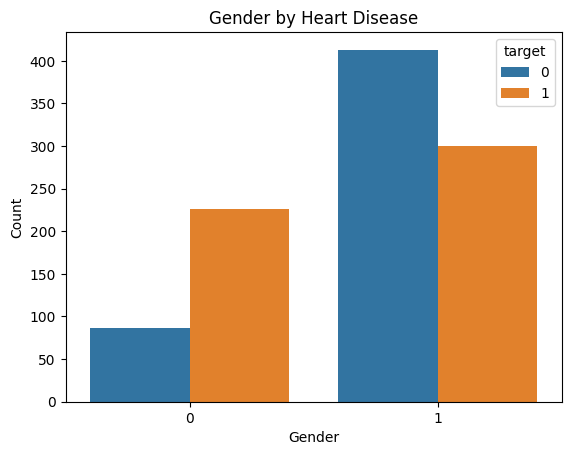

In [19]:
# Which gender has higher chance of getting heart disease?
df_gen_tar = clean_df.copy()

# Convert 'sex' and 'target' columns to appropriate data types
df_gen_tar['sex'] = df_gen_tar['sex'].astype(object)
df_gen_tar['target'] = df_gen_tar['target'].astype('category')

# Group by 'sex' and 'target' columns and count occurrences
df_gen_tar = df_gen_tar.groupby(['sex', 'target'], as_index=False)['age'].count()

# Create column chart using Seaborn
sns.barplot(x='sex', y='age', hue='target', data=df_gen_tar)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender by Heart Disease')
plt.show()

Male tends to have higher chance of getting heart disease than female.

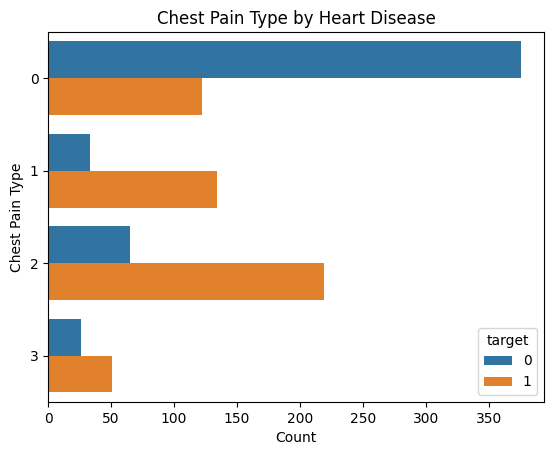

In [20]:
# Which chest pain type has highest possibilities to lead to heart disease?
df_cp_tar = clean_df.copy()

# Convert 'cp' and 'target' columns to appropriate data types
df_cp_tar['cp'] = df_cp_tar['cp'].astype(object)
df_cp_tar['target'] = df_cp_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_cp_tar = df_cp_tar.groupby(['cp', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='cp', hue='target', data=df_cp_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.title('Chest Pain Type by Heart Disease')
plt.show()

Chest pain type (2) has the higest likelihood to be detected as heart disease

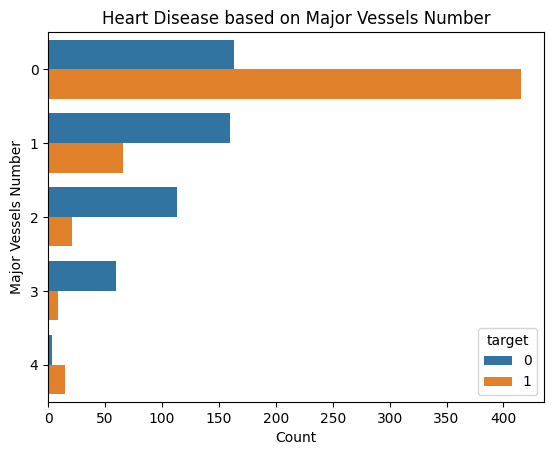

In [21]:
# Which major vessels number tend to detected as heart disease?
df_ca_tar = clean_df.copy()

# Convert 'ca' and 'target' columns to appropriate data types
df_ca_tar['ca'] = df_ca_tar['ca'].astype(object)
df_ca_tar['target'] = df_ca_tar['target'].astype('category')

# Group by 'cp' and 'target' columns and count occurrences
df_ca_tar = df_ca_tar.groupby(['ca', 'target'], as_index=False)['age'].count()

# Create horizontal column chart using Seaborn
sns.barplot(x='age', y='ca', hue='target', data=df_ca_tar, orient='h')
plt.xlabel('Count')
plt.ylabel('Major Vessels Number')
plt.title('Heart Disease based on Major Vessels Number')
plt.show()

Patient from 1 to 3 less likely to get heart disease on major vessels numbers while patient with 0 and 4 tend to get heart disease

In [23]:
def scatter_plot_with_correlation(x, y, title=None):
    """
    Create a scatter plot with correlation line.
    
    Parameters:
        - x: array-like, x-axis data
        - y: array-like, y-axis data
        - title: str, title for the plot (optional)
    """
    # Create scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Calculate correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Add correlation line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linestyle='--', label=f'Correlation: {corr_coef:.2f}')
    
    # Set plot title and labels
    if title:
        plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

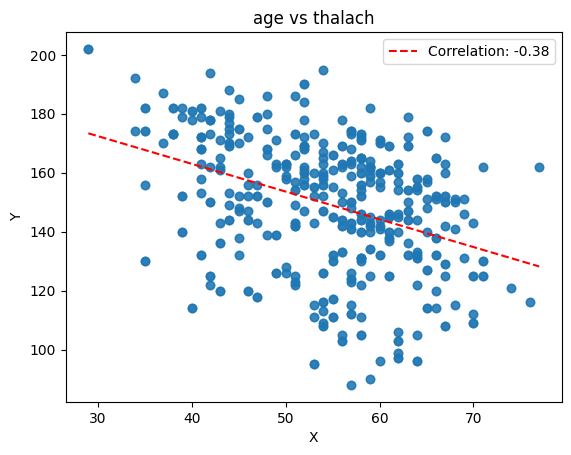

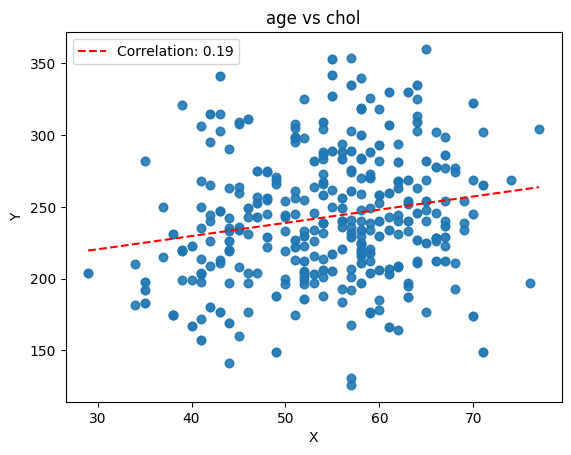

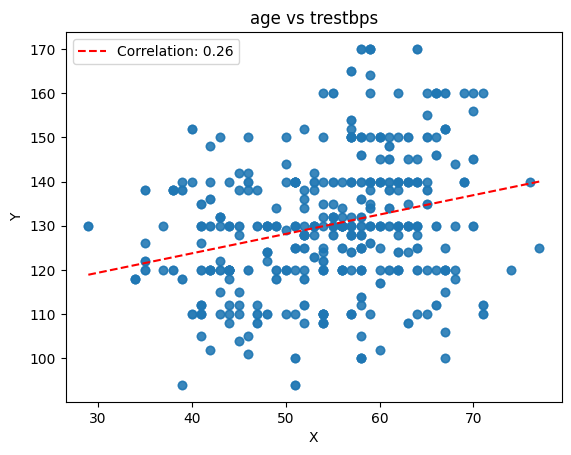

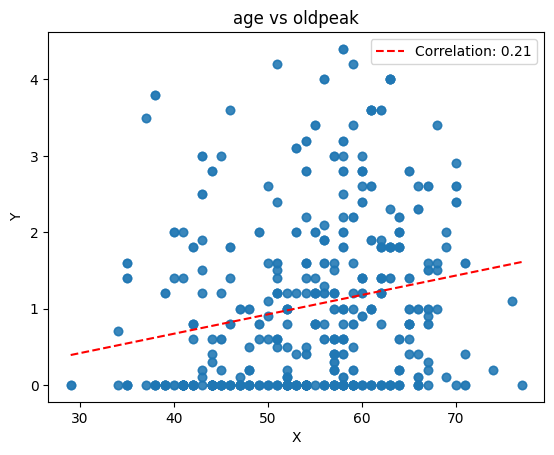

In [24]:
# Create a scatter plot to visualize the relationship between two numerical variables
df_scatter = clean_df.copy()
scatter_plot_with_correlation(df_scatter['age'], df_scatter['thalach'], title='age vs thalach')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['chol'], title='age vs chol')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['trestbps'], title='age vs trestbps')
scatter_plot_with_correlation(df_scatter['age'], df_scatter['oldpeak'], title='age vs oldpeak')

#### Findings from the scatter plots
From the scatter plots, 'trestbps', 'chol' and 'oldpeak' has higher correlation with the patient age but 'thalach' no